In [1]:
import numpy
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def filter_gaussi(numRows, numCols, sigma, bala_gozar=True):
   centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
   centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

   def gaussian(i,j):
      coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
      return 1 - coefficient if bala_gozar else coefficient

   return numpy.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])


def filter_dft(imageMatrix, filterMatrix):
   shiftedDFT = fftshift(fft2(imageMatrix))

   filteredDFT = shiftedDFT * filterMatrix
    
   return ifft2(ifftshift(filteredDFT))


def payin_gozar(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filter_dft(imageMatrix, filter_gaussi(n, m, sigma, bala_gozar=False))


def bala_gozar(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filter_dft(imageMatrix, filter_gaussi(n, m, sigma, bala_gozar=True))


def tasvir_hybrid(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
   tasvir_balaGozar = bala_gozar(highFreqImg, sigmaHigh)
   tasvir_payinGozar = payin_gozar(lowFreqImg, sigmaLow)

   return tasvir_balaGozar + tasvir_payinGozar




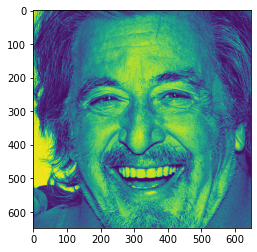

In [2]:
first_image = imageio.imread("input1.png", as_gray=True)
imgplot = plt.imshow(first_image)
plt.show()

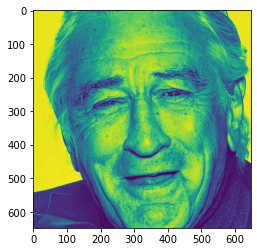

In [3]:
second_image = imageio.imread("input2.png", as_gray=True)
imgplot = plt.imshow(second_image)
plt.show()

Lossy conversion from float64 to uint8. Range [-135.39102019100264, 316.18816844253763]. Convert image to uint8 prior to saving to suppress this warning.


<function matplotlib.pyplot.show(close=None, block=None)>

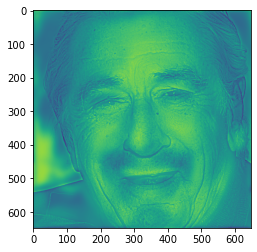

In [4]:
hybrid = tasvir_hybrid(second_image, first_image, 25, 10)
imageio.imwrite("output.png", numpy.real(hybrid))

imgplot = plt.imshow(numpy.real(hybrid))
plt.show